# Calidad de datos

In [26]:
import pandas as pd
import missingno as msno
import numpy as np

In [27]:
data = pd.read_csv("/home/ef/Documents/Diplomado/data/practica_missing.csv",sep=",",)
data.sample(4)

,maker,model,manufacture_year,stk_year,seat_count,fuel_type
419760,audi,a3,2000.0,None,None,gasoline
506125,mercedes-benz,NaN,2014.0,NaN,5,NaN
104131,nissan,micra,2012.0,2018,NaN,NaN
73689,peugeot,306,1996.0,NaN,5,NaN


In [28]:
(data.isnull().sum()/data.shape[0]).round(3)

maker               0.147
model               0.320
manufacture_year    0.104
stk_year            0.481
seat_count          0.211
fuel_type           0.520
dtype: float64

<AxesSubplot:>

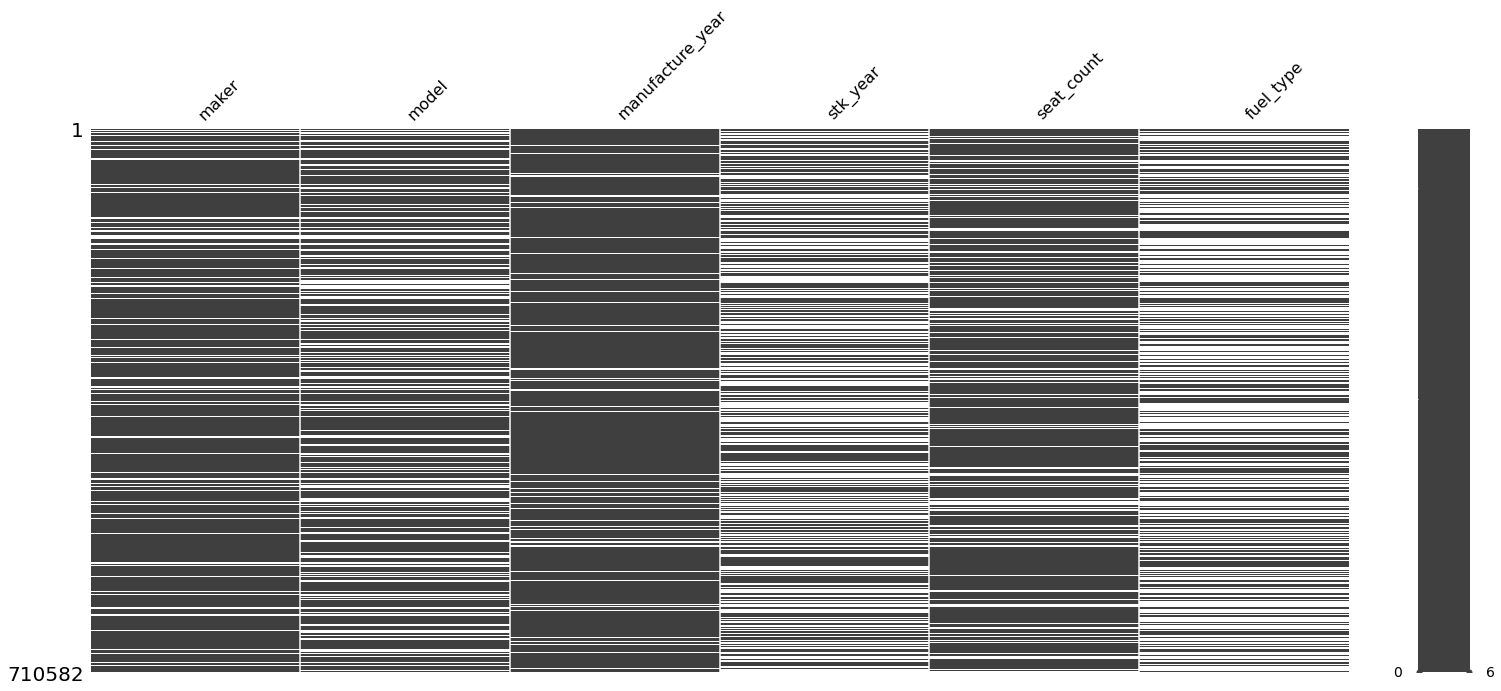

In [29]:
msno.matrix(data)
## la tabla está repleta de vacíos

In [30]:
## Diccionario
# maker - normalized all lowercase
# model - normalized all lowercase
# manufacture_year
# stk_year - year of the last emission control
# seat_count
# fuel_type - gasoline, diesel, cng, lpg, electric

## Asientos

In [31]:
data['seat_count'].value_counts(dropna= False)

## existen NaN y None, hay que juntarlos
## además hay outliers

5       353298
NaN     150010
None    107474
4        48983
7        20088
2        14708
3         6768
6         2777
9         2588
0         2370
8         1350
1          108
12           9
17           6
10           5
20           4
11           4
15           3
19           3
13           2
50           2
18           2
21           2
45           2
23           2
55           2
33           1
24           1
14           1
81           1
36           1
57           1
16           1
32           1
58           1
512          1
51           1
54           1
Name: seat_count, dtype: int64

In [32]:
#Diccionario para reemplazar
dict_replace={'None':np.nan}
data.seat_count=data.seat_count.replace(dict_replace)
data['seat_count'].value_counts(dropna= False)

5      353298
NaN    257484
4       48983
7       20088
2       14708
3        6768
6        2777
9        2588
0        2370
8        1350
1         108
12          9
17          6
10          5
20          4
11          4
19          3
15          3
13          2
18          2
21          2
50          2
45          2
23          2
55          2
33          1
24          1
14          1
81          1
36          1
57          1
16          1
32          1
58          1
512         1
51          1
54          1
Name: seat_count, dtype: int64

In [33]:
data['seat_count'] = data['seat_count'].astype(float)
data['seat_count'].describe()

count    453098.000000
mean          4.867653
std           1.235188
min           0.000000
25%           5.000000
50%           5.000000
75%           5.000000
max         512.000000
Name: seat_count, dtype: float64

In [34]:
#Se omite el 1% más grande porque es inusual
data = data[data['seat_count'] <= data['seat_count'].quantile(.99)]
data['seat_count'].describe()

count    449100.000000
mean          4.830835
std           0.869692
min           0.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           7.000000
Name: seat_count, dtype: float64

## Año manufactura

In [35]:
data['manufacture_year'].value_counts(dropna= False)

## existen outliers, se eliminarán

2015.0    66329
2012.0    36776
2011.0    32742
NaN       30015
2014.0    29847
          ...  
1936.0        1
1940.0        1
1942.0        1
1945.0        1
1015.0        1
Name: manufacture_year, Length: 93, dtype: int64

In [36]:
data['manufacture_year'].describe([i/100 for i in range(10,100,10)])

count    419085.000000
mean       2009.059088
std           6.152877
min        1015.000000
10%        2001.000000
20%        2004.000000
30%        2007.000000
40%        2009.000000
50%        2010.000000
60%        2012.000000
70%        2013.000000
80%        2015.000000
90%        2015.000000
max        2017.000000
Name: manufacture_year, dtype: float64

<AxesSubplot:>

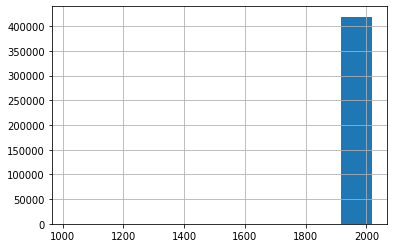

In [37]:
data['manufacture_year'].hist()

In [38]:
data = data[data['manufacture_year'] >= data['manufacture_year'].quantile(.1)]
data['manufacture_year'].describe([i/100 for i in range(10,100,10)])

count    384409.000000
mean       2010.224823
std           4.274635
min        2001.000000
10%        2004.000000
20%        2006.000000
30%        2008.000000
40%        2010.000000
50%        2011.000000
60%        2012.000000
70%        2014.000000
80%        2015.000000
90%        2015.000000
max        2017.000000
Name: manufacture_year, dtype: float64

<AxesSubplot:>

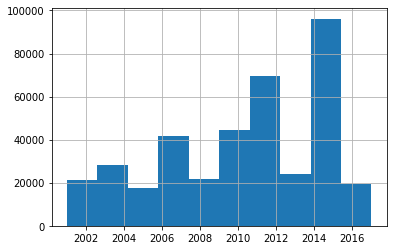

In [39]:
data['manufacture_year'].hist()

## Año emsión control

In [40]:
data['stk_year'].value_counts(dropna= False)

## existen NaN y None, hay que juntarlos
## además hay outliers

NaN     187537
None    138194
2018     21542
2017     18741
2016     15743
2019      2568
2020        64
2021        14
2070         2
3017         2
2116         1
2080         1
Name: stk_year, dtype: int64

In [41]:
dict_replace={'None':np.nan}
data.stk_year=data.stk_year.replace(dict_replace)
data['stk_year'].value_counts(dropna= False)

NaN     325731
2018     21542
2017     18741
2016     15743
2019      2568
2020        64
2021        14
2070         2
3017         2
2116         1
2080         1
Name: stk_year, dtype: int64

In [42]:
data['stk_year'] = data['stk_year'].astype(float)
data['stk_year'].describe([i/100 for i in range(10,100,10)])

count    58678.000000
mean      2017.229234
std          5.931854
min       2016.000000
10%       2016.000000
20%       2016.000000
30%       2017.000000
40%       2017.000000
50%       2017.000000
60%       2018.000000
70%       2018.000000
80%       2018.000000
90%       2018.000000
max       3017.000000
Name: stk_year, dtype: float64

In [43]:
data = data[data['stk_year'] <= data['stk_year'].quantile(.99)]
data['stk_year'].describe()

count    58594.000000
mean      2017.186623
std          0.881375
min       2016.000000
25%       2016.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: stk_year, dtype: float64

## Marca

In [44]:
data['maker'].value_counts(dropna= False)

volkswagen       9776
bmw              5448
audi             4817
mercedes-benz    4807
opel             4486
ford             4028
NaN              3388
skoda            2082
renault          2051
peugeot          1726
toyota           1636
fiat             1567
seat             1553
citroen          1380
hyundai          1324
nissan           1240
volvo             905
kia               854
mazda             712
mini              711
smart             636
suzuki            511
porsche           493
honda             486
mitsubishi        464
chevrolet         335
rover             252
jeep              189
jaguar            157
subaru            125
lexus             121
chrysler          115
lancia             78
dodge              70
bentley            16
maserati           14
infinity           11
isuzu              11
lamborghini         6
lotus               6
tesla               4
hummer              3
Name: maker, dtype: int64

In [45]:
data['maker'].isnull().sum()/data.shape[0]

0.057821619961088165

In [46]:
## Se propone eliminar los registros sin maker, dado que "sólo" el 6% están vacíos

data = data[~(data['maker'].isnull())]

0

In [47]:
data.isnull().sum()/data.shape[0]

maker               0.000000
model               0.214343
manufacture_year    0.000000
stk_year            0.000000
seat_count          0.000000
fuel_type           0.930605
dtype: float64